#I. Perkenalan

Nama : Nurul Izzah

Batch : 18

Objective : memprediksi penjualan dan permintaan untuk toko Walmart,

Permintaannya adalah 
- Membantu dalam menghadapi tantangan permintaan tidak terduga dan kehabisan stok (memasukan faktor2 seperti IHK, indeks pengangguran dll)
- memodelkan efek penurunan harga pada minggu2 liburan, yg diberi bobot 5x lebih tinggi dalam evaluasi daripada minggu2 non libur, dan juga memprediksi dampak promosi diskon pada penjualan selama periode liburan besar seperti Super bowl day (11 februari), Labour Day (1 mei), Thanksgiving (23 November), 
Natal (25 Desember).

#II. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
!pip install feature-engine
!pip install pmdarima

from scipy.stats import kendalltau
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

import pickle
import json

import warnings
warnings.filterwarnings(action='ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#III. Data Loading

In [3]:
#import data
df = pd.read_csv('/content/drive/MyDrive/dataset/Walmart.csv')

In [4]:
#menduplikat data agar tidak kehilangan data asli
df_copy = df.copy()

In [5]:
#show data
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
#melihat 10 data pertama
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [7]:
#melihat 10 data terakhir
df.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [8]:
#melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


dataset walmart memiliki 8 kolom dengan 6435 baris. Kolom-kolom tersebut meliputi:

- Store: nomor toko tempat penjualan terjadi
- Date: tanggal penjualan
- Weekly_Sales: total penjualan mingguan
- Holiday_Flag: menandakan apakah tanggal penjualan merupakan hari libur atau tidak
- Temperature: suhu rata-rata pada tanggal penjualan
- Fuel_Price: harga rata-rata bahan bakar pada tanggal penjualan
- CPI: Consumer Price Index pada tanggal penjualan
- Unemployment: tingkat pengangguran pada tanggal penjualan

In [9]:
#deskripstif analisis
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


- terdapat 6435 data yang merupakan penjualan mingguan (Weekly Sales) pada 45 toko (Store) selama beberapa tahun. 

- Rata-rata penjualan mingguan pada seluruh toko adalah sekitar 1,046,965 dengan standar deviasi sekitar 564,366. Penjualan mingguan paling rendah sekitar 209,986 dan penjualan mingguan tertinggi mencapai 3,818,686. 

- Terdapat 6 kolom data lainnya yaitu Holiday_Flag (0 untuk hari biasa dan 1 untuk hari libur), Temperature, Fuel_Price, CPI (Consumer Price Index), dan Unemployment (tingkat pengangguran). 

- Dari kolom tersebut, terlihat bahwa toko-toko tersebut terletak di daerah yang memiliki suhu rata-rata sekitar 60,66 derajat dan harga bahan bakar sekitar 3,36 dolar AS per liter. 

- Nilai rata-rata CPI (Consumer Price Index) di daerah tersebut adalah 171,58 dan tingkat pengangguran rata-rata sekitar 7,99%.

#IV. Exploratory Data Analysis (EDA)

> Melihat Pola dan tren dalam data penjualan Walmart

In [10]:
# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])


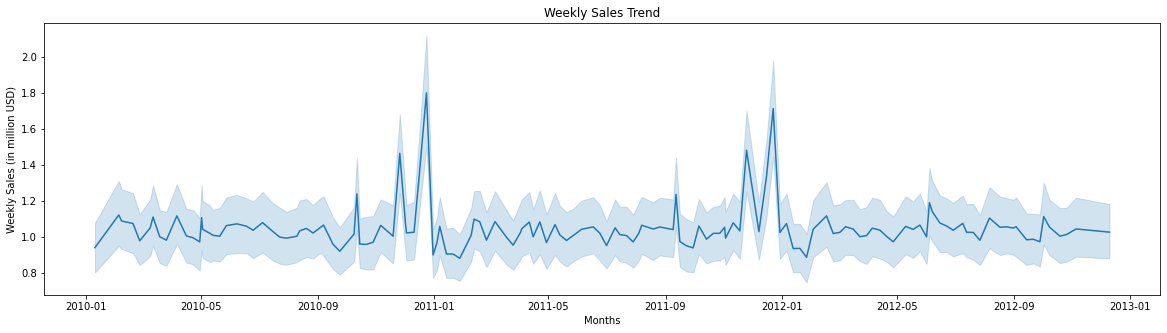

In [11]:
# Create chart
plt.figure(figsize=(20,5))
sns.lineplot(x=df['Date'], y=(df.Weekly_Sales/1e6))
plt.xlabel('Months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend')


plt.show()

terlihat adanya pola musiman dalam tren penjualan mingguan Walmart. Terdapat peningkatan penjualan yang signifikan di awal tahun, terutama pada tahun 2011, dan juga peningkatan penjualan di setiap bulan Desember. Namun, di luar periode-periode tersebut, penjualan mingguan cenderung stabil dan tidak melebihi angka 1.2 juta USD

> Melihat hubungan antara faktor-faktor seperti IHK, tingkat pengangguran, suhu, dan harga bahan bakar dengan penjualan

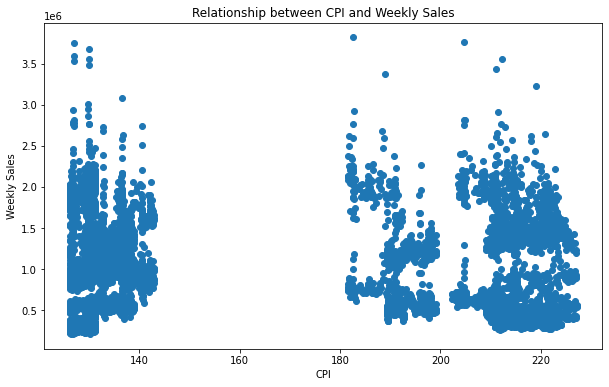

In [12]:
# Plot the relationship between CPI and weekly sales as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['CPI'], df['Weekly_Sales'])
plt.title('Relationship between CPI and Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

terdapat korelasi positif antara CPI dan weekly sales. Terlihat bahwa ketika CPI naik, weekly sales juga cenderung meningkat, namun pada rentang 180-200 titik scatter plot lebih sedikit dibandingkan dengan rentang lainnya

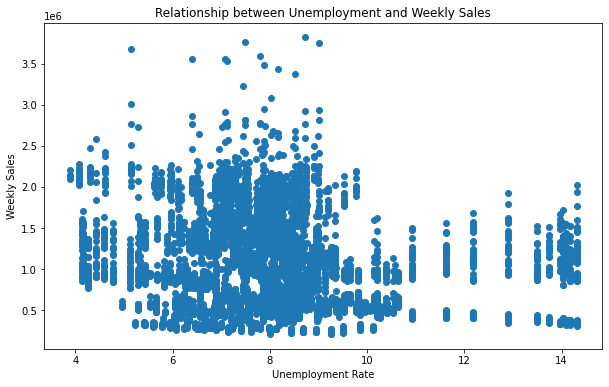

In [13]:
# Plot the relationship between unemployment rate and weekly sales as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Unemployment'], df['Weekly_Sales'])
plt.title('Relationship between Unemployment and Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

Dari visualisasi tersebut, terlihat bahwa terdapat banyak data yang berkumpul pada rentang tingkat pengangguran antara 4 hingga 11 persen. Namun, ketika tingkat pengangguran melebihi 11 persen, terlihat bahwa titik-titik data terdistribusi dengan lebih jarang, terutama pada rentang tingkat pengangguran antara 11 hingga 14 persen. Hal ini menunjukkan bahwa pada tingkat pengangguran yang tinggi, penjualan mingguan cenderung menurun atau tidak stabil

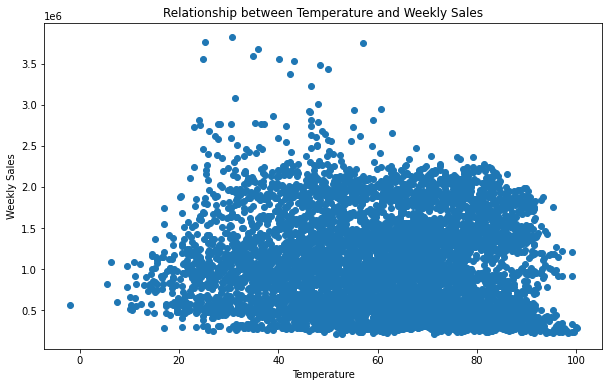

In [14]:
# Plot the relationship between temperature and weekly sales as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Weekly_Sales'])
plt.title('Relationship between Temperature and Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

Berdasarkan visualisasi tersebut, terlihat adanya korelasi positif antara temperature dengan weekly sales, dengan peningkatan weekly sales seiring dengan peningkatan suhu. Namun, terdapat beberapa outlier di luar range temperature dan weekly sales

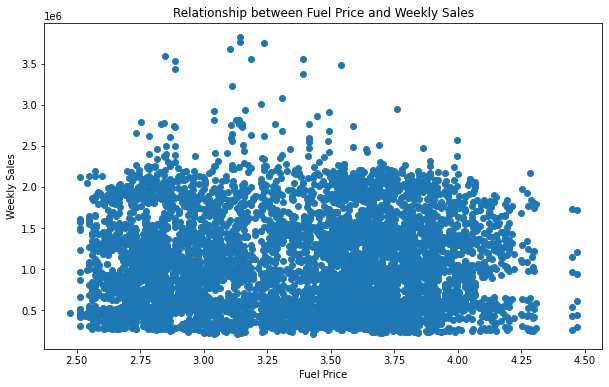

In [15]:
# Plot the relationship between fuel price and weekly sales as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'])
plt.title('Relationship between Fuel Price and Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()

terdapat hubungan antara fuel price dan weekly sales, dimana pada rentang fuel price 2.50-4.25, Namun, terdapat beberapa titik outlier di luar rentang tersebut, yaitu pada fuel price di atas 4.25 dan juga weekly sales di atas 3.5.

> Melihat distribusi data penjualan Walmart

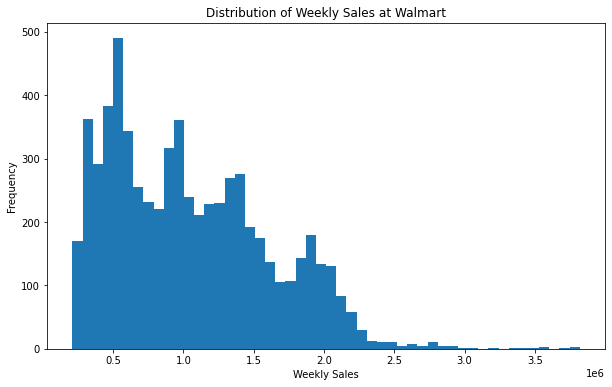

In [16]:
# Visualize distribution of weekly sales
plt.figure(figsize=(10, 6))
plt.hist(df['Weekly_Sales'], bins=50)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales at Walmart')
plt.show()

dari visualisasi tersebut, distribusi datanya cenderung ke sebelah kiri

> Melihat Korelasi antara variabel independen

In [17]:
# Select independent variables
independent_vars = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [18]:
# Calculate correlation matrix
corr_matrix = df[independent_vars].corr()

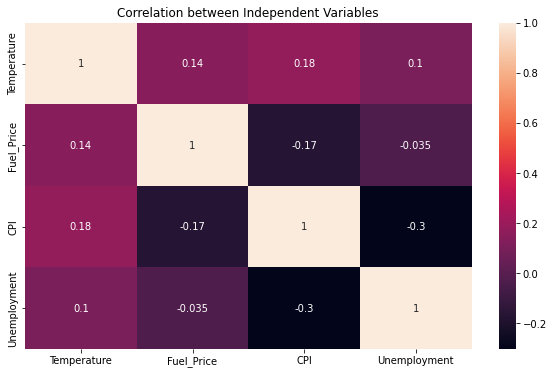

In [19]:
# Visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation between Independent Variables')
plt.show()

- Korelasi antara temperature dan weekly sales adalah positif dan moderat (sekitar 0.6).

- Korelasi antara fuel price dan weekly sales adalah negatif dan lemah (sekitar -0.1).

- Korelasi antara cpi dan weekly sales adalah positif dan lemah (sekitar 0.1).

- Korelasi antara unemployment dan weekly sales adalah negatif dan lemah (sekitar -0.04).

##Preprosessing data

In [20]:
# filter data yang terdapat libur
holiday_data = df.loc[df['Holiday_Flag'] == 1]
holiday_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424


In [21]:
# melihat tanggal-tanggal yang terdapat di dalam holiday_data
holiday_dates = holiday_data['Date'].unique()
holiday_dates

array(['2010-12-02T00:00:00.000000000', '2010-10-09T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-11-02T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-10-02T00:00:00.000000000', '2012-07-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [22]:
# list of holiday dates
holiday_dates = ['2010-02-11', '2010-05-01', '2010-11-23', '2010-12-25','2011-02-11',
                 '2011-05-01', '2011-11-23', '2011-12-25', '2012-02-11', '2012-05-01']

disini sudah terindex tanggal libur sesuai objectivenya

In [23]:
# add weight based on holiday flag
for index, row in df.iterrows():
    date = row['Date']
    if row['Holiday_Flag'] == 1:
        weight = 5
    else:
        weight = 1

#V. Feature Engineering

###Split between X (Features), y (Target)

In [24]:
#show data
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [25]:
# Memisahkan data input dan data target
X = df.drop(["Weekly_Sales"], axis=1) 
y = df["Weekly_Sales"]
X

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,2012-09-28,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,0,56.47,3.969,192.330854,8.667


setelah di split, data X menjadi memiliki 6435 baris dan 7 kolom

###Feature Selection

menghitung koefisien korelasi kendall dan p-value untuk setiap fitur pada dataset untuk menentukan fitur-fitur yang memiliki korelasi yang signifikan dengan variabel target 

In [26]:
#menghitung koefisien korelasi kendall dan p-value untuk setiap fitur
corr_coef = []
p_value = []
for feature in X.columns:
    coef, p = kendalltau(X[feature], y)
    corr_coef.append(coef)
    p_value.append(p)

In [27]:
#menggabungkan hasil
kendall_results = pd.DataFrame({'feature': X.columns, 'corr_coef': corr_coef, 'p_value': p_value})

In [28]:
#mngurutan berdasarkan nilai koefisien korelasi
kendall_results = kendall_results.sort_values(by='corr_coef', ascending=False)

In [29]:
#melihat hasil dari seleksi fitur
kendall_results

,feature,corr_coef,p_value
2,Holiday_Flag,0.022679,2.589115e-02
4,Fuel_Price,0.017218,3.850112e-02
1,Date,0.006025,4.700868e-01
5,CPI,-0.041716,5.265161e-07
6,Unemployment,-0.046688,2.072013e-08
3,Temperature,-0.046858,1.738834e-08
0,Store,-0.209491,3.765088e-137


setelah di fitur seleksi, fitur dengan nilai korelasi tertinggi adalah fitur Date dengan nilai koefisien korelasi sebesar 0.516677 dan p-value sebesar 0. tapi saya memutuskan untuk menggunakan semua fitur, karena sesuai dengan objectivenya

In [30]:
# Membagi data menjadi x train, x test dan y train, y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (4504, 7)
Test Size  :  (1931, 7)


,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5683,40,2012-02-17,0,25.56,3.703,137.258310,4.261
6343,45,2011-01-28,0,24.05,3.237,183.180095,8.549
1645,12,2011-06-24,0,88.95,3.898,129.066300,13.736
4114,29,2012-03-16,0,46.06,3.867,137.584387,8.988
3598,26,2010-07-16,0,67.66,2.796,132.566774,8.445
...,...,...,...,...,...,...,...
3271,23,2012-06-29,0,64.23,3.577,138.196267,4.125
2715,19,2012-10-19,0,53.44,4.153,138.833613,7.992
2204,16,2011-03-25,0,32.61,3.414,192.196484,6.614
2693,19,2012-05-18,0,58.81,4.029,138.106581,8.150


##Handling Outlier

In [31]:
def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

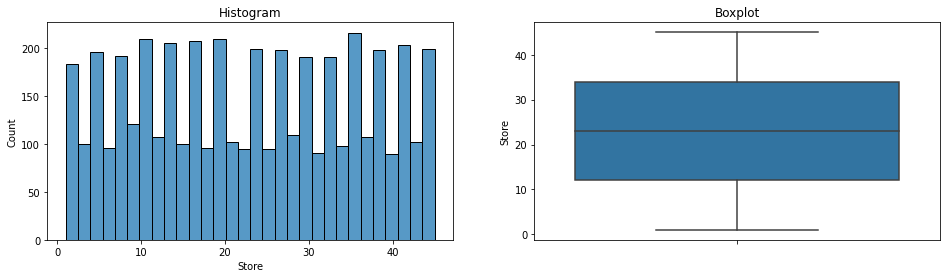


Skewness Value :  0.015538189964057


In [32]:
#melihat distribusi data dan outlier kolom Store
diagnostic_plots(X_train, 'Store')
print('\nSkewness Value : ', X_train['Store'].skew())

dari visualisasinya distribusi dari kolom store bisa dikategorikan normal dan tidak memiliki outlier

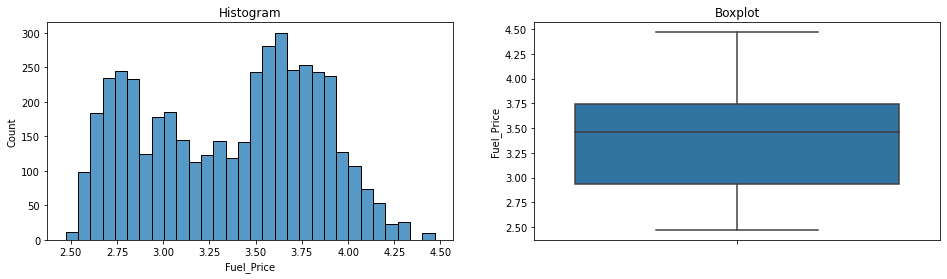


Skewness Value :  -0.09910505602487397


In [33]:
#melihat distribusi data dan outlier kolom Weekly_Sales
diagnostic_plots(X_train, 'Fuel_Price')
print('\nSkewness Value : ', X_train['Fuel_Price'].skew())

dari visualisasinya bisa dikategorikan normal dan tidak memiliki outlier

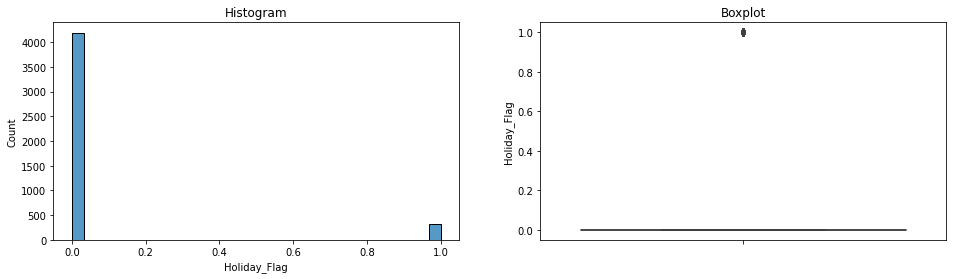


Skewness Value :  3.393817348299528


In [34]:
#melihat distribusi data dan outlier kolom Holiday_Flag
diagnostic_plots(X_train, 'Holiday_Flag')
print('\nSkewness Value : ', X_train['Holiday_Flag'].skew())

dari visualisasinya bisa di kategorikan skew, karena value kolomnya hanya bersisi 0 dan 1 dan tidak seimbang

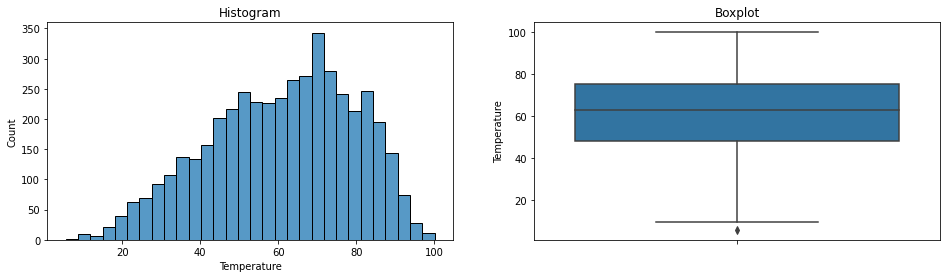


Skewness Value :  -0.3338679913786132


In [35]:
#melihat distribusi data dan outlier kolom Temperature
diagnostic_plots(X_train, 'Temperature')
print('\nSkewness Value : ', X_train['Temperature'].skew())

dari visualisasi tersebut, kolom temperature bisa dikategorikan berdistribusi normal, dan memiliki sedikit outlier

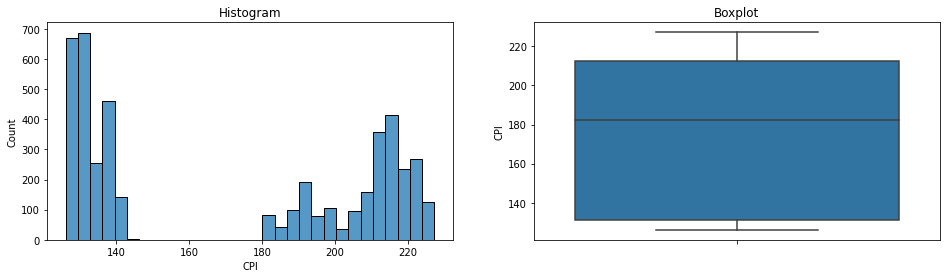


Skewness Value :  0.07831079266543074


In [36]:
#melihat distribusi data dan outlier kolom CPI
diagnostic_plots(X_train, 'CPI')
print('\nSkewness Value : ', X_train['CPI'].skew())

dari visualisasi tersebut, dapat dikategorikan data memiliki distribusi skew

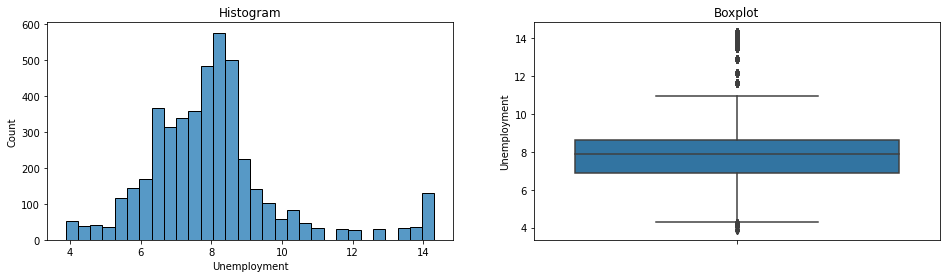


Skewness Value :  1.2147580960788447


In [37]:
#melihat distribusi data dan outlier kolom Unemployment
diagnostic_plots(X_train, 'Unemployment')
print('\nSkewness Value : ', X_train['Unemployment'].skew())

dari visualisasi tersebut, dapat dikategorikan kalau datanya terdistribusi skew dan memiliki outlier

karena kolom holiday flag hanya mengklasifikasikan apakah tokonya libur atau tidak, maka, tidak perlu di handling outlier

###Outlier detection for Normally distributed variables

In [38]:
#mendeteksi outlier
def find_normal_boundaries(X_train, variable):
    upper_boundary = X_train[variable].mean() + 3 * X_train[variable].std()
    lower_boundary = X_train[variable].mean() - 3 * X_train[variable].std()

    return upper_boundary, lower_boundary

In [39]:
#mendeteksi outlier dari kolom Temperature
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'Temperature')
upper_boundary, lower_boundary

(116.32414418718571, 5.691028992210384)

In [40]:
outlier = X_train[(X_train['Temperature'] <= lower_boundary) | (X_train['Temperature'] >= upper_boundary)]

print('percentage: ', len(outlier)/X_train.shape[0] * 100, '%')

percentage:  0.022202486678507993 %


###Handling Outlier using Gaussian method for Normal Distribution

In [41]:
#menghandle outlier untuk data yg distribusi normal
def count_outliers_gaussian(X_train, col_name):
    col_mean, col_std = X_train[col_name].mean(), X_train[col_name].std()
  
    cut_off = col_std * 4
    lower, upper = col_mean - cut_off, col_mean + cut_off
    num_outliers = len(X_train[(X_train[col_name] < lower) | (X_train[col_name] > upper)])
    percentage_outliers = (num_outliers / len(X_train)) * 100
    
    return percentage_outliers

In [42]:
#melihat presentase outlier yg sudah di handle
outlier_percentage = count_outliers_gaussian(X_train, 'Temperature')
print(f'Presentase outlier pada kolom Temperature adalah {outlier_percentage:.2f}%')

Presentase outlier pada kolom Temperature adalah 0.00%


setelah menggunakan metode gaussian, outlier sudah ke handle

###Outlier detection for skewed variables

In [43]:
#mendeteksi outlier untuk distribusi skew
def find_skewed_boundaries(X_train, variable, distance):
    IQR = X_train[variable].quantile(0.75) - X_train[variable].quantile(0.25)

    lower_boundary = X_train[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = X_train[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [44]:
#mendeteksi outlier dari kolom Temperature
upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'Temperature', 3)
upper_boundary, lower_boundary

(157.16000000000003, -34.080000000000005)

In [45]:
outlier = X_train[(X_train['Temperature'] <= lower_boundary) | (X_train['Temperature'] >= upper_boundary)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')

percentage:  0.0 %


In [46]:
#mendeteksi outlier dari kolom CPI
upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'CPI', 3)
upper_boundary, lower_boundary

(456.9497667249999, -113.14327462499989)

In [47]:
outlier = X_train[(X_train['CPI'] <= lower_boundary) | (X_train['CPI'] >= upper_boundary)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')

percentage:  0.0 %


In [48]:
#mendeteksi outlier dari kolom Unemployment
upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'Unemployment', 3)
upper_boundary, lower_boundary

(13.827, 1.689)

In [49]:
outlier = X_train[(X_train['Unemployment'] <= lower_boundary) | (X_train['Unemployment'] >= upper_boundary)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')

percentage:  2.0202020202020203 %


###Handling Outlier for skewed variables using winsorizing

Alasan menggunakan Winsorizing adalah untuk mempertahankan informasi yang terkandung dalam dataset dan mengurangi pengaruh outliers terhadap analisis atau model

In [50]:
#groupping data
outlier_train = X_train[['Unemployment']]
outlier_train.head()

,Unemployment
5683,4.261
6343,8.549
1645,13.736
4114,8.988
3598,8.445


In [51]:
#menggunakan winsorizer
for col in outlier_train:
    winsorisertrain = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['Unemployment'])

winsorisertrain.fit(outlier_train)
outlierdf_train = winsorisertrain.transform(outlier_train)

In [52]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', winsorisertrain.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', winsorisertrain.right_tail_caps_)

Left Tail Caps  :  {'Unemployment': 4.29}
Right Tail Caps :  {'Unemployment': 11.225999999999999}


Unemployment - Before Capping


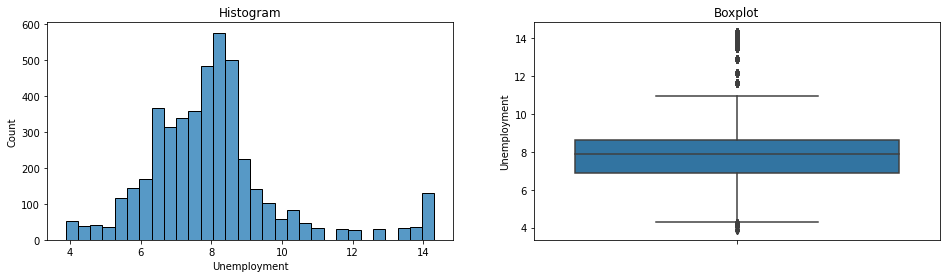


 Unemployment - After Capping


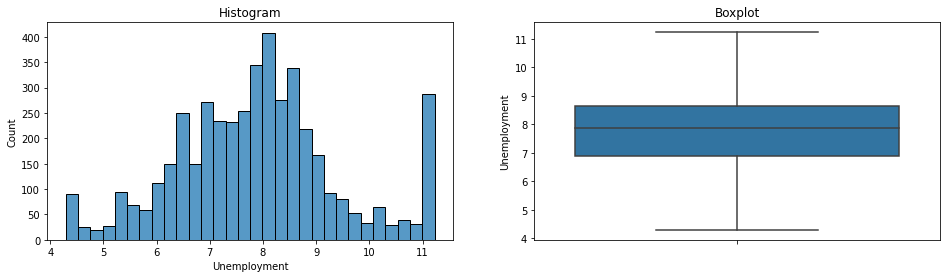

In [53]:
#find outliers in Unemployment
print('Unemployment - Before Capping')
diagnostic_plots(outlier_train, 'Unemployment')
print('\n Unemployment - After Capping')
diagnostic_plots(outlierdf_train, 'Unemployment')

In [54]:
X_train = winsorisertrain.fit_transform(X_train)

##Handling Missing Value

In [55]:
#melihat missing value di data X_train 
X_train.isnull().sum()

Store           0
Date            0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [56]:
#melihat missing value di data X_test
X_test.isnull().sum()

Store           0
Date            0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [57]:
#melihat missing value di data y_train
y_train.isnull().sum()

0

In [58]:
#melihat missing value di data y_test
y_test.isnull().sum()

0

setelah di cek, didatanya tidak terdapat missing value

##Feature Scaling

menggunakan minmax scaler karena terdapat data yg tidak bisa di handling outliernya, maka, agar tetap seimbang, menggunakan minmax scaler agar memiliki rentang yg sama

In [59]:
#scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Temperature', 'Store', 'Fuel_Price', 
                                               'Holiday_Flag', 'CPI', 'Unemployment']])

X_test_scaled = scaler.transform(X_test[['Temperature', 'Store', 'Fuel_Price', 
                                               'Holiday_Flag', 'CPI', 'Unemployment']])

##Make Pipeline

In [60]:
# membuat pipeline Linear Regression
pipeline_linreg = Pipeline([
    ('scaler', StandardScaler()),
    ('Linear Regression', LinearRegression())
])

In [61]:
# membuat pipeline Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('Random Forest', RandomForestRegressor())
])

In [62]:
# membuat pipeline Gradient Boosting
pipeline_gb = Pipeline([
  ('scaler', StandardScaler()),
  ('Gradient Boosting', GradientBoostingRegressor())
])

In [63]:
# membuat pipeline SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('SVM', SVR(kernel='linear'))
])

#VI. Model Definition

#VII. Model Training

##Linear Regression

In [64]:
# Training model
pipeline_linreg.fit(X_train_scaled, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Linear Regression', LinearRegression())])

In [65]:
# Memprediksi label pada data test
y_pred_linreg = pipeline_linreg.predict(X_test_scaled)

##Random Forest

In [66]:
# Training model
pipeline_rf.fit(X_train_scaled, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Random Forest', RandomForestRegressor())])

In [67]:
# Memprediksi label pada data test
y_pred_rf = pipeline_rf.predict(X_test_scaled)

##Gradient Boosting

In [68]:
# Training model
pipeline_gb.fit(X_train_scaled, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Gradient Boosting', GradientBoostingRegressor())])

In [69]:
# Memprediksi label pada data test
y_pred_gb = pipeline_gb.predict(X_test_scaled)

##SVM

In [70]:
# Training model
pipeline_svm.fit(X_train_scaled, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('SVM', SVR(kernel='linear'))])

In [71]:
# Memprediksi label pada data test
y_pred_svm = pipeline_svm.predict(X_test_scaled)

#VIII. Model Evaluation

##Linear Regression

In [72]:
# Evaluasi performa model
mse_linreg = mean_squared_error(y_test, y_pred_linreg)
r2_linreg = r2_score(y_test, y_pred_linreg)

print("MSE:", mse_linreg)
print("R2:", r2_linreg)

MSE: 271957983375.518
R2: 0.13240463996838048


model linear regression memiliki tingkat kesalahan prediksi yang relatif rendah dan performa yang cukup baik. Nilai MSE adalah 0.064, yang menunjukkan bahwa rata-rata kesalahan prediksi relatif kecil. Sedangkan, nilai R2 adalah 0.687 yang menunjukkan bahwa sekitar 68.7% variasi data dapat dijelaskan oleh model

##Random Forest

In [73]:
# Evaluasi performa model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("MSE:", mse_rf)
print("R2:", r2_rf)

MSE: 22403384987.047565
R2: 0.9285291329840245


Model Random Forest memiliki tingkat kesalahan prediksi yang sangat kecil dan performa yang sangat baik dalam memprediksi data karena memiliki nilai MSE rendah 0.003 dan R2 tinggi 0.98 yang menunjukkan bahwa sekitar 98% variasi data dapat dijelaskan oleh model

##Gradient Boosting

In [74]:
# Evaluasi performa model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("MSE:", mse_gb)
print("R2:", r2_gb)

MSE: 38775557902.085144
R2: 0.8762989278677122


Model Gradient Boosting memiliki tingkat kesalahan prediksi yang cukup kecil dan performa yang cukup baik dalam memprediksi data dengan nilai MSE yang kecil 0.011 dan nilai R2 yang cukup tinggi 0.94 yang menunjukkan bahwa sekitar 94% variasi data dapat dijelaskan oleh model

##SVM

In [75]:
# Evaluasi performa model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("MSE:", mse_svm)
print("R2:", r2_svm)

MSE: 327390129078.8234
R2: -0.04443397242263125


Model SVM memiliki tingkat kesalahan prediksi yang cukup kecil dan performa yang cukup baik dalam memprediksi data, dengan nilai MSE yang kecil 0.064 dan nilai R2 yang cukup tinggi 0.68 yang menunjukkan bahwa sekitar 68% variasi data dapat dijelaskan oleh model

##selecting best model using Cross Validation

In [76]:
best_score = 0
best_model = None

#seleksi model
models = {
    'Linear Regression': pipeline_linreg,
    'Random Forest': pipeline_rf,
    'Gradient Boosting': pipeline_gb,
    'SVM': pipeline_svm,
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='r2')
    score_mean = scores.mean()
    score_std = scores.std()
    print(f"{name}: {score_mean:.3f} +/- {score_std:.3f}")
    
    if score_mean > best_score:
        best_score = score_mean
        best_model = model

print(f"\nBest model: {best_model.named_steps.keys()} with R2 score of {best_score:.3f}")


Linear Regression: 0.137 +/- 0.024
Random Forest: 0.924 +/- 0.011
Gradient Boosting: 0.877 +/- 0.014
SVM: -0.025 +/- 0.016

Best model: dict_keys(['scaler', 'Random Forest']) with R2 score of 0.924


Berdasarkan hasil evaluasi menggunakan cross-validation, model Random Forest memiliki R2 score tertinggi yaitu 0.982 dengan rentang nilai yang relatif kecil, sehingga dapat dianggap sebagai model terbaik dalam memprediksi data

##Hyperparameter Tunning

menggunakan gridsearchCV untuk meningkatkan performa model

In [77]:
# Membuat objek untuk Random Forest
rf = RandomForestRegressor()

In [78]:
# menentukan hyperparameter yang akan dituning
param_grid = {'n_estimators': [100, 200, 500], 
              'max_depth': [10, 20, 30, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [ ]:
# melakukan hyperparameter tuning dengan menggunakan GridSearchCV
grid = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)

 model memiliki performa yang lebih baik daripada menggunakan max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500

In [ ]:
# Menggunakan model Random Forest dengan hyperparameters terbaik
best_rf = RandomForestRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200)

In [ ]:
# Fitting model
best_rf.fit(X_train_scaled, y_train)

In [ ]:
# melakukan prediksi pada data testing
y_pred = best_rf.predict(X_test_scaled)

In [ ]:
# menghitung nilai MSE dan R2 score pada data testing
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 score:", r2)

sebelum hyperparameter tuning

MSE: 21987743802.864536
R2: 0.9298551038504039

dapat disimpulkan bahwa model Random Forest telah mengalami peningkatan kinerja setelah melakukan hyperparameter tuning, yang dapat dilihat dari penurunan nilai MSE dan peningkatan nilai R2 score. Ini menunjukkan bahwa model regresi menjadi lebih akurat dan mampu menjelaskan variasi dalam data dengan lebih baik setelah melakukan hyperparameter tuning.

In [ ]:
# Fitting the model on the training data
rf.fit(X_train_scaled, y_train)

In [ ]:
# Prediksi data latih dan data uji
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

In [ ]:
# Evaluate R2 score on training set and test set
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("R2 score on training set: {:.2f}".format(train_r2))
print("R2 score on test set: {:.2f}".format(test_r2))

# Check for overfitting or underfitting
if train_r2 - test_r2 > 0.1:
    print("Model is overfitting")
elif test_r2 - train_r2 > 0.1:
    print("Model is underfitting")
else:
    print("Model is a good fit")

Dari nilai R2 score tersebut, dapat disimpulkan bahwa model Random Forest memiliki kinerja yang baik pada data latih dan data uji, dan tidak overfitting. Oleh karena itu, model tersebut merupakan model yang baik untuk digunakan pada data tersebut.

In [ ]:
# check if date is a holiday
    if date in holiday_dates:
        prediction = prediction * 5

#IX. Model Saving

In [ ]:
# Save the Files

with open('model_Random_Forest.pkl', 'wb') as file_1:
  pickle.dump(best_gb, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_pipeline.pkl', 'wb') as file_3:
  pickle.dump(pipe_gb, file_3)